## CDC Diabetes Health Indicators Project - Exploratory Data Analysis 
Goal of project: To better understand the relationship between lifestyle and diabetes in the US \
[Link to CDC Diabetes Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [5]:
import pandas as pd

# Read data
df_all = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
df_binary5050 = pd.read_csv("data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_binary = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")


In [6]:
df_all.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Diabetes_012: \
0 = No diabetes, 1 = Pre-diabetes, 2 = Diabetes

In [8]:
df_all.keys()

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
total_subj = len(df_all.Diabetes_012)
print(total_subj)

253680


(array([213703.,      0.,      0.,      0.,      0.,   4631.,      0.,
             0.,      0.,  35346.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

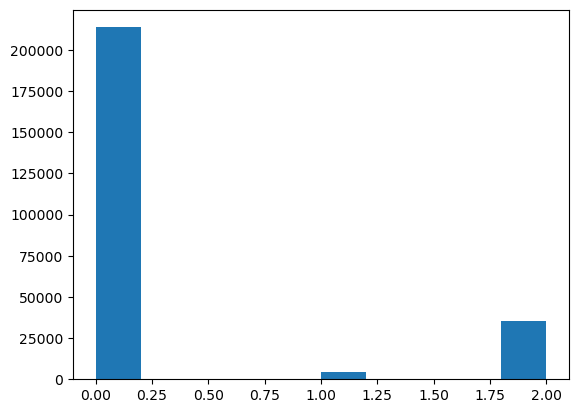

In [10]:
# Quantify the number of people with diabetes and without
import matplotlib.pyplot as plt
import numpy as np

y = df_all.Diabetes_012
plt.hist(y)

In [11]:
# Quantifying percentages

n_no_diabetes = list(y).count(0)
n_prediabetes = list(y).count(1)
n_diabetes = list(y).count(2)

print("There are", n_diabetes, "diabetes,", n_prediabetes, "pre-diabetes patients and", n_no_diabetes, "patients without diabetes")
print("That's", round((n_diabetes/total_subj)*100,2) , "% diabetes and", round((n_prediabetes/total_subj)*100,2), "% pre-diabetes")

There are 35346 diabetes, 4631 pre-diabetes patients and 213703 patients without diabetes
That's 13.93 % diabetes and 1.83 % pre-diabetes


array([[<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
       [<Axes: title={'center': '2.0'}>, <Axes: >]], dtype=object)

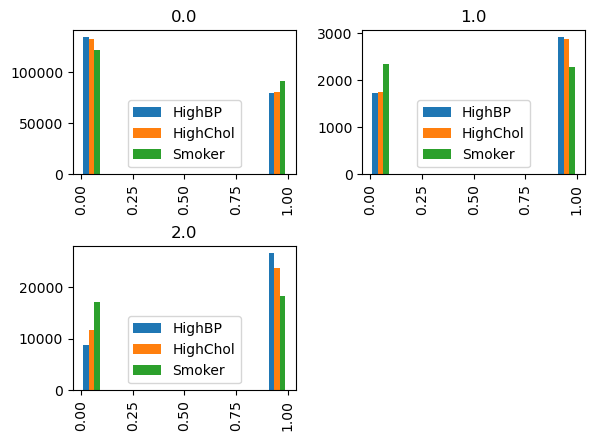

In [7]:
# Plot histograms
df_all.hist(['HighBP','HighChol', 'Smoker'], by = 'Diabetes_012',
           legend = True)

Those with diabetes tend to have high BP and high chol, at a higher percentage than the control group.

array([[<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
       [<Axes: title={'center': '2.0'}>, <Axes: >]], dtype=object)

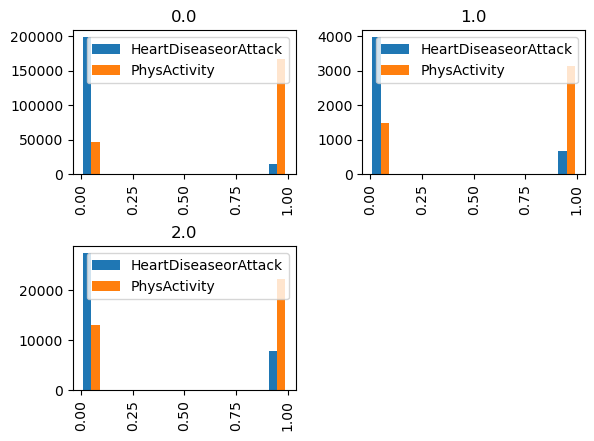

In [8]:
# Plot histograms
df_all.hist(['HeartDiseaseorAttack', 'PhysActivity'], by = 'Diabetes_012',
           legend = True)

There seems to be more people who get physical activity than not, in the diabetes group.

In [9]:
## Correlation matrix between features

corr = df_all.corr()
corr.style.background_gradient(cmap='coolwarm')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


Physical Health and general health seem to be highly correlated (makes sense), as well as income and education.

<Axes: xlabel='Age', ylabel='BMI'>

C:\Users\chend\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\chend\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


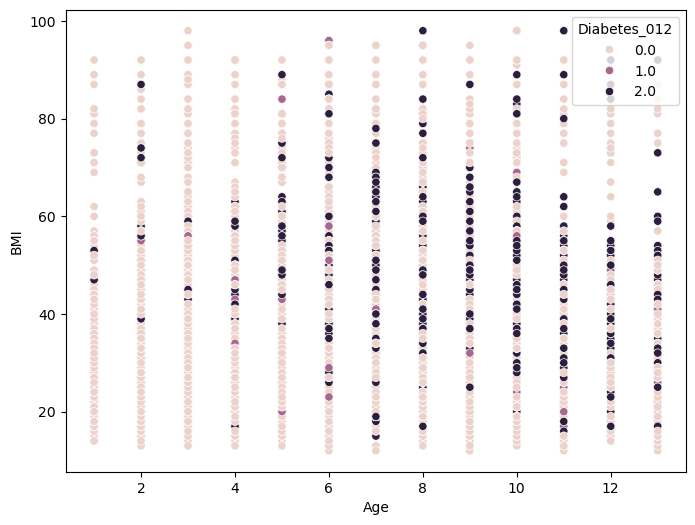

In [10]:
# Scatter plots
import seaborn as sns

## BMI vs. age
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Age', y='BMI', hue='Diabetes_012', data=df_all) # Note: age is grouped into bins (5 year)


In [11]:
# Create a correlation matrix for those with diabetes and those without, separately

df_diabetes = df_all.loc[df_all.Diabetes_012 == 2,:]
df_no_diabetes = df_all.loc[df_all.Diabetes_012 == 0,:]


In [12]:
df_diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,2.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [13]:
# Diabetic group
# Restrict to continuous variables
corr_diab = df_diabetes[['BMI','GenHlth',
       'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income']].corr()
corr_diab.style.background_gradient(cmap='coolwarm')

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
BMI,1.000000,0.149047,0.103090,0.122354,-0.221206,-0.027517,-0.068402
GenHlth,0.149047,1.000000,0.327888,0.547667,-0.056077,-0.216606,-0.316476
MentHlth,0.103090,0.327888,1.000000,0.391259,-0.173747,-0.094664,-0.210719
PhysHlth,0.122354,0.547667,0.391259,1.000000,-0.031858,-0.121236,-0.249606
Age,-0.221206,-0.056077,-0.173747,-0.031858,1.000000,-0.038628,-0.036746
Education,-0.027517,-0.216606,-0.094664,-0.121236,-0.038628,1.000000,0.443203
Income,-0.068402,-0.316476,-0.210719,-0.249606,-0.036746,0.443203,1.000000


In [14]:
# Non-diabetic group
# Restrict to continuous variables
corr_no_diab = df_no_diabetes[['BMI','GenHlth',
       'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income']].corr()
corr_no_diab.style.background_gradient(cmap='coolwarm')

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
BMI,1.000000,0.192260,0.062395,0.075256,-0.059971,-0.088209,-0.063779
GenHlth,0.192260,1.000000,0.286940,0.496953,0.126135,-0.267741,-0.343215
MentHlth,0.062395,0.286940,1.000000,0.332424,-0.097930,-0.092683,-0.197467
PhysHlth,0.075256,0.496953,0.332424,1.000000,0.091163,-0.139704,-0.243516
Age,-0.059971,0.126135,-0.097930,0.091163,1.000000,-0.087637,-0.109882
Education,-0.088209,-0.267741,-0.092683,-0.139704,-0.087637,1.000000,0.435170
Income,-0.063779,-0.343215,-0.197467,-0.243516,-0.109882,0.435170,1.000000


Not much difference in correlation matrix between the two groups. However, it's interesting to note that there is a stronger relationship between BMI and age in the diabetic group (r = -0.22) compared to the non-diabetic group (r = -0.059).